<a href="https://colab.research.google.com/github/dineshdaultani/CNN_training/blob/master/notebooks/2020_07_25_final/MNIST_prefilled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This notebook is a tutorial for how to train a CNN model on MNIST dataset.  
### MNIST contains pictures of handwritten digits. 

### References:
Code: https://keras.io/examples/mnist_cnn/  
MNIST: http://yann.lecun.com/exdb/mnist/  

### Let's start with importing relevant libraries

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

### **Load the MNIST dataset** from inbuilt keras function

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### **Visualize data**

label: 5


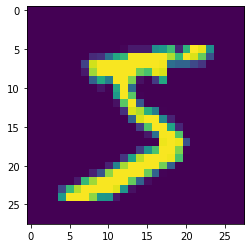

In [ ]:
nth_img = 0
print('label: ' + str(y_train[nth_img]))
plt.imshow(x_train[nth_img].reshape((28, 28)))

### We will initialize some parameters that we would be using later

In [ ]:
batch_size = 128
num_classes = 10
epochs = 5
img_rows, img_cols = 28, 28

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### **Preprocessing the images**
* Format the training and testing images data to float32. 
* Next we will **normalize** each pixel by dividing 255. Now each pixel will be in range [0, 1]

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### **Preprocessing the labels**
* We will use inbuilt [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) function to convert labels to one-hot encoding vector 



In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### **Designing the model**
Let's create a [sequential](https://keras.io/api/models/sequential/) model in keras. Architecture of our model is going to look like as follows:

1. [**Conv2D layer**](https://keras.io/api/layers/convolution_layers/convolution2d/)
  * With 32 filters and kernel size (3,3) and relu activation
2. **Conv2D layer**
  * With 64 filters and kernel size (3,3) and relu activation
3. [**MaxPooling2D layer**](https://keras.io/api/layers/pooling_layers/max_pooling2d/)
  * With pool_size (2,2)
4. [**Flatten** ](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)
5. [**Dense**](https://keras.io/api/layers/core_layers/dense/) with 128 neurons and relu activation
6. [**Dropout**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (optional)
7. Last **Dense** layer with **softmax** activations.


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

### We will **compile** our model by defining loss, optimizer and metrics that we will use to train our network.
* loss: [categorical_crossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-function)
* optimizer: [Adadelta](https://keras.io/api/optimizers/adadelta/)
* metrics: [accuracy](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

### Now, let's **train our model** by using the parameters that we defined before.

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.2711 - accuracy: 0.9162 - val_loss: 0.0588 - val_accuracy: 0.9811
Epoch 2/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0896 - accuracy: 0.9740 - val_loss: 0.0376 - val_accuracy: 0.9883
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0659 - accuracy: 0.9802 - val_loss: 0.0369 - val_accuracy: 0.9877
Epoch 4/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0540 - accuracy: 0.9841 - val_loss: 0.0327 - val_accuracy: 0.9890
Epoch 5/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.0286 - val_accuracy: 0.9904


### **Evaluation** of the trained model on validation data

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028583086468774853
Test accuracy: 0.9904000163078308


### We can **visualize or analyze our model** to see how our predictions looks like. 

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred_labels = np.argmax(y_pred, axis = 1)
y_test_labels = np.argmax(y_test, axis = 1)

actual_label: 0
predicted_label: 0


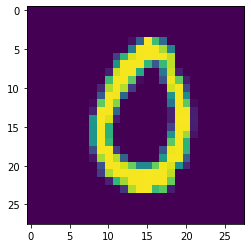

In [ ]:
nth_img = 1001
print('actual_label: '  + str(y_test_labels[nth_img]))
print('predicted_label: '  + str(y_pred_labels[nth_img]))
plt.imshow(x_test[nth_img].reshape((28, 28)))

### How about we **visualize images that our model predicted incorrectly**.  
*   First we have to get the indexes of the images where y_pred and y_test doesn't match
*   Then we can visualize them one by one



In [ ]:
np.where(y_pred_labels != y_test_labels)

(array([ 247,  320,  321,  445,  449,  659,  717,  740,  882,  947, 1014,
        1033, 1039, 1112, 1226, 1232, 1242, 1247, 1260, 1319, 1393, 1527,
        1530, 1549, 1621, 1681, 1709, 1717, 1878, 1901, 2035, 2040, 2098,
        2118, 2130, 2135, 2293, 2369, 2387, 2406, 2462, 2488, 2630, 2654,
        2896, 2921, 2927, 2939, 3030, 3060, 3073, 3225, 3384, 3422, 3503,
        3520, 3558, 3727, 3767, 3780, 3808, 3941, 4007, 4078, 4176, 4238,
        4248, 4256, 4497, 4639, 4731, 4740, 4761, 4807, 4860, 5937, 5955,
        6091, 6576, 6597, 6625, 6651, 6783, 8094, 8325, 8527, 9009, 9015,
        9019, 9530, 9642, 9664, 9692, 9729, 9770, 9982]),)

actual_label: 2
predicted_label: 7


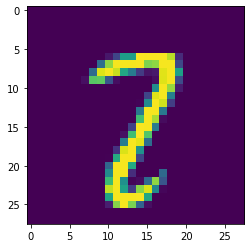

In [ ]:
nth_img = 321
print('actual_label: '  + str(y_test_labels[nth_img]))
print('predicted_label: '  + str(y_pred_labels[nth_img]))
plt.imshow(x_test[nth_img].reshape((28, 28)))

***Want to try something more on other small datasets?***
*   https://keras.io/api/datasets/  (Contains **CIFAR** and **Fashion MNIST** dataset)



